In [2]:
import pandas as pd
file_path = "StudentsPerformance_with_headers.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

  STUDENT ID  Student Age  Sex  Graduated high-school type  Scholarship type  \
0   STUDENT1            2    2                           3                 3   
1   STUDENT2            2    2                           3                 3   
2   STUDENT3            2    2                           2                 3   
3   STUDENT4            1    1                           1                 3   
4   STUDENT5            2    2                           1                 3   

   Additional work  Regular artistic or sports activity  \
0                1                                    2   
1                1                                    2   
2                2                                    2   
3                1                                    2   
4                2                                    2   

   Do you have a partner  Total salary if available  \
0                      2                          1   
1                      2                          1   

In [3]:
df.shape

(345, 33)

In [4]:
df.isnull().sum()

STUDENT ID                                                           0
Student Age                                                          0
Sex                                                                  0
Graduated high-school type                                           0
Scholarship type                                                     0
Additional work                                                      0
Regular artistic or sports activity                                  0
Do you have a partner                                                0
Total salary if available                                            0
Transportation to the university                                     0
Accommodation type in Cyprus                                         0
Mother’s education                                                   0
Father’s education                                                   0
Number of sisters/brothers                                           0
Parent

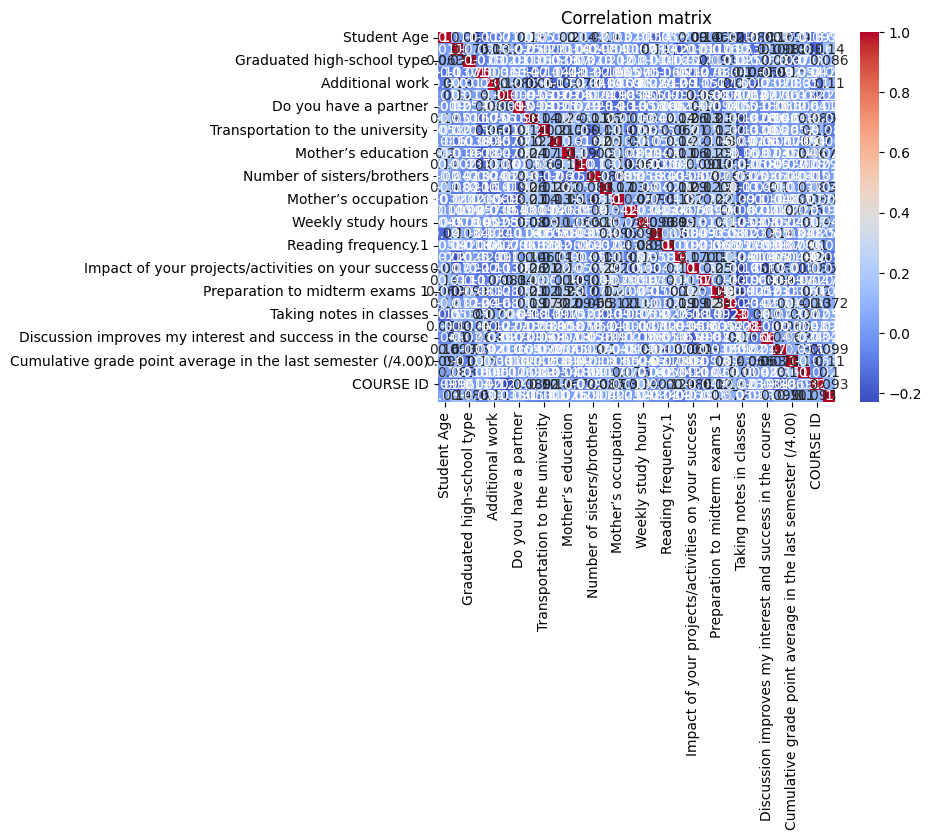

In [10]:
# Heat of Correlations

import matplotlib.pyplot as plt
import seaborn as sns

#création d'un dataset provisoire pour afficher la matrice de corelation
df_numeric = df.select_dtypes(include=['number'])
# Calcul de la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Affichage de la heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

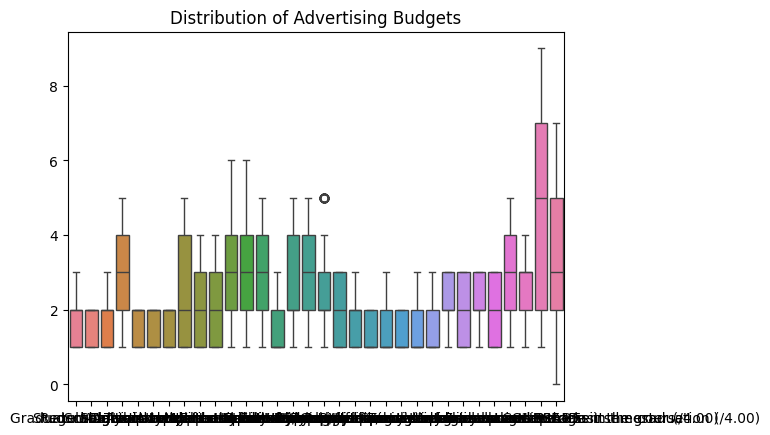

In [11]:
# Box plots

import matplotlib.pyplot as plt
import seaborn as sns

# Création d'un boxplot pour TV, Radio et Newspaper
sns.boxplot(data=df_numeric)
plt.title('Distribution of Advertising Budgets')
plt.show()